ç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmak.

- aşırı öğrenmeye karşı dirençli
- çok oarametre olduugnda daha iyi
- yanlı fakat varyansı küçük
- çoklu değişkenler arası korelasyon cok yuksek olursa
- ilgisiz degiskenleri modelden cıkarmaz sadece katsayısını 0a yaklastırır.
- lambda için iyi değer bulunması önemli. Bunun icin CV(cross validation) yöntemi kullanılır
- lambda ayar parametresi, kullanıcı tarafından verilir.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [ ]:
df=pd.read_csv("/content/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['Division','League','NewLeague']])
y=df["Salary"]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=42)

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
df.shape

(263, 20)

In [ ]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)

In [ ]:
ridge_model

Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar

In [ ]:
ridge_model=Ridge()
katsayilar =[]
for i in lambdalar:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train, y_train)
  katsayilar.append(ridge_model.coef_)

In [ ]:
katsayilar

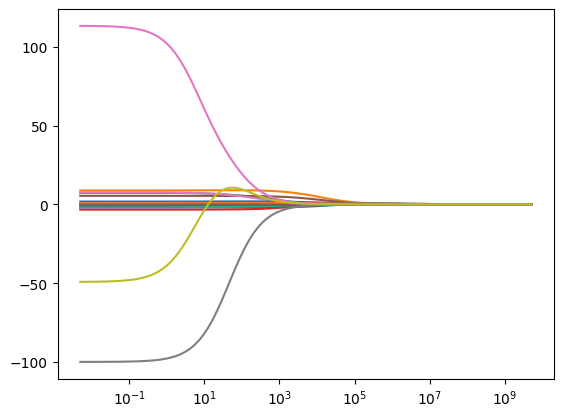

In [ ]:
ax=plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

##Tahmin

In [ ]:
ridge_model=Ridge().fit(X_train, y_train)

In [ ]:
y_pred=ridge_model.predict(X_train)

In [ ]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [ ]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [ ]:
RMSE=np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
RMSE

289.34470696006565

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))
#cv=10 -> 10 katlı çapraz doğrulama
#bu hata değeri daha doğru

351.3931585606325

In [ ]:
y_pred=ridge_model.predict(X_test)

In [ ]:
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.80829057302424

##Model Tuning

In [ ]:
ridge_model=Ridge(1).fit(X_train, y_train)
y_pred=ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.80829057302424

In [ ]:
lambdalar1 =np.random.randint(0,100,10)#0 1000 arası 100 tane
lambdalar2= 10**np.linspace(10,-2,100)*0.5

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Verileri normalize et
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# RidgeCV modelini oluştur
ridgecv = RidgeCV(alphas=lambdalar2, scoring="neg_mean_squared_error", cv=10)
ridgecv.fit(X_train_scaled, y_train)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [ ]:
ridgecv.alpha_
#bu model için optimum parametre

115.5064850041579

In [ ]:
#final modeli

In [ ]:
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train, y_train)

In [ ]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.95767723584765